In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm

In [10]:
def accretion_mass(file):

    tree = np.load(file)
    mass = tree["mass"]
    redshift = tree["redshift"]
    mass = np.delete(mass, 1, axis=0) #there is some weird bug for this index
    mask = mass != -99. # converting to NaN values
    mass = np.where(mask, mass, np.nan)  
    ana_mass = np.nanmax(mass, axis=1) #finding the maximum mass
    ana_index = np.nanargmax(mass, axis=1)
    ana_redshift = redshift[ana_index]

    return ana_mass, ana_redshift

In [11]:
mass, red = accretion_mass("../../data/Mhalo_test_8_0/tree_0.npz")

In [12]:
def SHMF_old(mass, mass_min=-4, Nbins=50, plot=True):
 
    mass_frac = mass/np.max(mass) #normalizing by host mass
    mass_frac[:, 0] = 0.0  # removing the host mass from the matrix
    zero_mask = mass_frac != 0.0 
    ana_mass = np.log10(np.where(zero_mask, mass_frac, np.nan))  # up until here the stats are good
    
    def histofunc(mass, bins=False): # nested function
        if bins==True:
            return np.histogram(mass, range=(mass_min, 0), bins=Nbins)
        else:
            return np.histogram(mass, range=(mass_min, 0), bins=Nbins)[0]

    # now to start counting!
    m_counts, bins = histofunc(ana_mass[0], bins=True)  # to be keep in memory, only needs to be measured once
    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    I = np.apply_along_axis(histofunc, 1, ana_mass)  # this applies the histogram to the whole matrix

    SHMF_ave = np.average(I, axis=0)

    SHMF_std = np.std(I, axis=0)
        
    if plot == True:
        plt.figure(figsize=(8, 8))

        plt.plot(bincenters, np.log10(SHMF_ave/binsize), label="average", marker="o", color="black")
        plt.plot(bincenters, np.log10((SHMF_ave+SHMF_std)/binsize), label="1 $\sigma$", marker=".", ls=":", color="grey")
        plt.plot(bincenters, np.log10((SHMF_ave-SHMF_std)/binsize), marker=".", ls=":", color="grey")

        plt.xlabel("log (m/M)", fontsize=20)
        plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=20)
        plt.legend()
        plt.show()

    return bincenters, np.array([SHMF_ave, SHMF_std])

In [15]:
def differential(mass, mass_bins, binsize): # nested function
    N = np.histogram(mass, bins=mass_bins)[0]
    return N/binsize

In [17]:
mass_bins = np.linspace(-5,0,25)
binsize = mass_bins[1] - mass_bins[0]

In [20]:
differential( np.log10(mass/np.max(mass)), mass_bins, binsize)

array([0.00000e+00, 2.87520e+03, 1.02336e+04, 6.17280e+03, 4.32480e+03,
       2.51040e+03, 1.80480e+03, 1.07520e+03, 7.29600e+02, 4.22400e+02,
       2.54400e+02, 1.44000e+02, 1.34400e+02, 5.28000e+01, 3.84000e+01,
       1.44000e+01, 9.60000e+00, 1.92000e+01, 4.80000e+00, 0.00000e+00,
       1.44000e+01, 0.00000e+00, 0.00000e+00, 4.80000e+00])

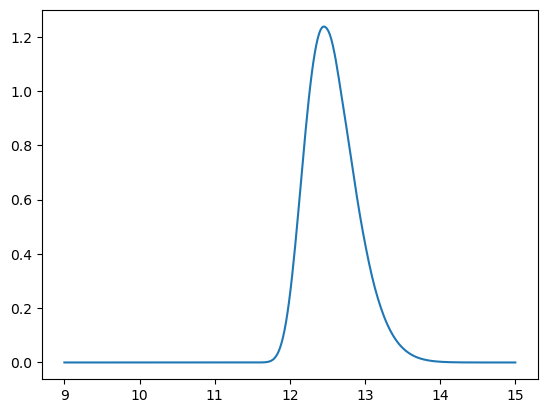

In [9]:
halo = np.load("../etc/halo_mass_PDF_full.npy")
plt.plot(halo[:,0], halo[:,1])

In [174]:
def plot_single_realization(tree, nhalo=20, rand=True, i=10):

    mass = tree["mass"]
    time = tree["CosmicTime"]

    if rand==True:
        select = np.random.randint(1,mass.shape[0],nhalo)
    elif rand==False:
        select = np.linspace(i,i+nhalo, nhalo).astype("int")

    colors = cm.viridis(np.linspace(0, 1, nhalo))

    plt.figure(figsize=(6,6))

    for i in range(nhalo):
        plt.plot(time, mass[select[i]], color=colors[i])

    plt.plot(time, mass[0], color="red")
    plt.xlabel("Gyr", fontsize=15)
    plt.ylabel("halo mass (M$_{\odot}$)", fontsize=15)
    plt.yscale("log")
    plt.axhline(10**8, ls="--", color="black")
    plt.ylim(1e4,1e14)
    plt.show()

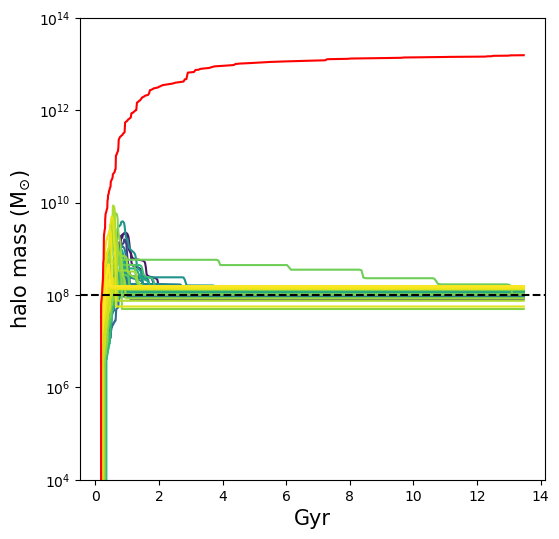

In [194]:
plot_single_realization(np.load("../../data/5_8_0/10^4/tree_13.033_1evo.npz"), 100, rand=False, i=11100)

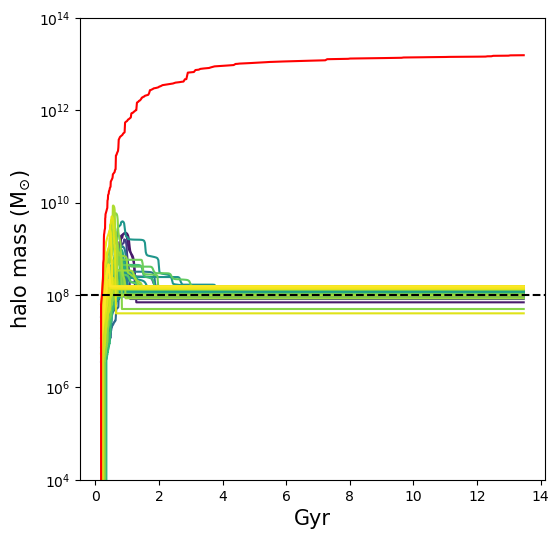

In [195]:
plot_single_realization(np.load("../../data/5_8_0/tree_13.033_1_evo.npz"), 100, rand=False, i=11100)

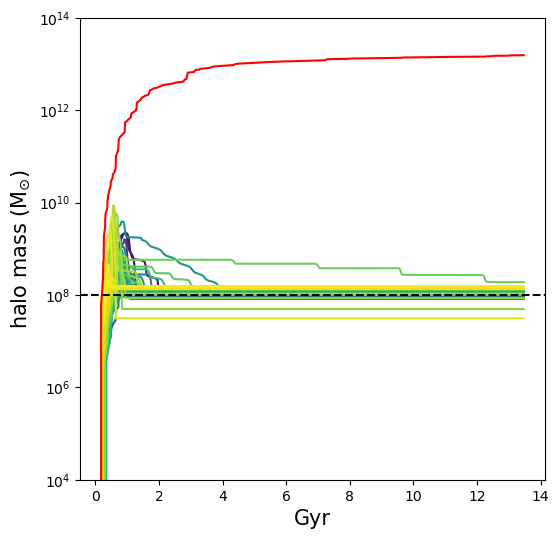

In [196]:
plot_single_realization(np.load("../../data/5_8_0/withering/tree_13.033_1evo.npz"), 100, rand=False, i=11100)

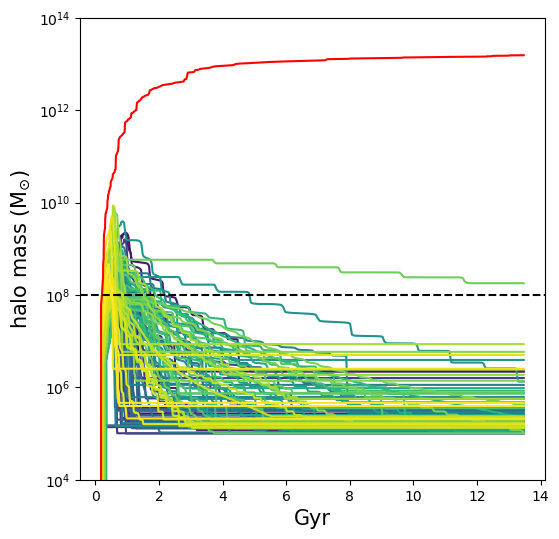

In [186]:
plot_single_realization(np.load("../../data/5_8_0/arbres/tree_13.033_1evo.npz"), 100, rand=False, i=11100)

In [41]:
# def fix_tree(file):
#     tree = np.load(file)
#     mass = tree["mass"]
#     mask = ~np.isnan(mass)
#     new_mass = np.where(mask, mass, -99)

#     np.savez(file, 
#     redshift = tree["redshift"],
#     CosmicTime = tree["CosmicTime"],
#     mass = new_mass,
#     order = tree["order"],
#     ParentID =  tree["ParentID"],
#     VirialRadius =  tree["VirialRadius"],
#     concentration =  tree["concentration"],
#     coordinates =  tree["coordinates"],
#     )

# import os
# files = []    
# for filename in os.listdir("../../data/1000_8_0/"):
#     if filename.startswith('tree') and not filename.endswith('evo.npz'): 
#         files.append(os.path.join("../../data/1000_8_0/", filename))


# for i in files:
#     fix_tree(i)